<a href="https://colab.research.google.com/github/thdgmltjd123/MLProject/blob/master/homework_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 데이터셋 학습 (to do)
MNIST 데이터셋은0~9까지 총 10개의 label로 이루어진 이미지 분류를 위한 사이즈의 손글씨 데이터셋이다.  
각각의 레이블마다 28×28 크기 이미지인 60,000개의 training 데이터셋, 10,000개의 test 데이터셋이 존재하고, 결과적으로 총 70,000개의 28×28 크기의 이미지로 데이터셋이 구성되어 있다.

In [133]:
import tensorflow.keras.utils as utils
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras import backend

from tensorflow.keras.layers import Flatten, BatchNormalization, Dropout, ReLU
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## (1) 데이터셋

In [134]:
(X_train, Y_train),(X_test, Y_test) = datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [135]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

Y_train = utils.to_categorical(Y_train)
Y_test = utils.to_categorical(Y_test)

print(X_train.shape, Y_train.shape)

n_in = X_train.shape[1:]
n_out = Y_train.shape[-1]

(60000, 28, 28, 1) (60000, 10)


## (2) 모델링

In [144]:
# 99.5
def CNN(n_in, n_out):
  model = Sequential()
  model.add(Conv2D(16, kernel_size = (3,3), padding = 'same', input_shape = n_in))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Conv2D(32, kernel_size = (3,3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(ReLU())
  model.add(Conv2D(64, kernel_size = (5,5), padding = 'same'))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Conv2D(128, kernel_size = (5,5), padding = 'same'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Conv2D(32, kernel_size = (3,3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Flatten())
  model.add(Dense(n_out, activation = 'softmax'))

  return model
  

In [137]:
def CNN(n_in, n_out):
  model = Sequential()
  model.add(Conv2D(32, kernel_size = (3,3), padding = 'same', input_shape = n_in))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Conv2D(32, kernel_size = (3,3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(ReLU())
  model.add(Conv2D(64, kernel_size = (5,5), padding = 'same'))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Conv2D(128, kernel_size = (5,5), padding = 'same'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Conv2D(32, kernel_size = (3,3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Flatten())
  model.add(Dense(256))
  model.add(ReLU())
  model.add(Dense(n_out, activation = 'softmax'))

  return model
  

In [138]:
model = CNN(n_in, n_out)
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_76 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 re_lu_94 (ReLU)             (None, 28, 28, 32)        0         
                                                                 
 conv2d_73 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_77 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 14, 14, 32)     

## (3) 모델의 학습과정 설정

In [139]:
from tensorflow.keras.optimizers import Adam

In [140]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

## (4) 모델 학습시키기

In [145]:
history = model.fit(X_train, Y_train, batch_size = 256, epochs = 40, validation_split = 0.2)

Epoch 1/40
188/188 [==============================] - 12s 63ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0506 - val_accuracy: 0.9917
Epoch 2/40
188/188 [==============================] - 12s 62ms/step - loss: 0.0051 - accuracy: 0.9987 - val_loss: 0.0512 - val_accuracy: 0.9903
Epoch 3/40
188/188 [==============================] - 12s 62ms/step - loss: 0.0073 - accuracy: 0.9975 - val_loss: 0.0412 - val_accuracy: 0.9920
Epoch 4/40
188/188 [==============================] - 12s 62ms/step - loss: 0.0024 - accuracy: 0.9991 - val_loss: 0.0360 - val_accuracy: 0.9933
Epoch 5/40
188/188 [==============================] - 12s 62ms/step - loss: 2.9568e-04 - accuracy: 0.9999 - val_loss: 0.0359 - val_accuracy: 0.9933
Epoch 6/40
188/188 [==============================] - 12s 62ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0363 - val_accuracy: 0.9935
Epoch 7/40
188/188 [==============================] - 12s 64ms/step - loss: 3.7252e-05 - accuracy: 1.0000 - val_loss: 0.0327 - val_a

## (5) 모델 평가하기

In [146]:
loss_and_accuracy = model.evaluate(X_test, Y_test, batch_size=256)
print('loss : %.4f, accruracy : %.4f'%(loss_and_accuracy[0],loss_and_accuracy[1]))

40/40 [==============================] - 1s 22ms/step - loss: 0.0252 - accuracy: 0.9958
loss : 0.0252, accruracy : 0.9958


## (6) 모델 사용하기

모델 평가 후, 분류 오류가 난 사례들을 확인해보고, 모델과 데이터셋에 대한 평가 및 분석해볼 것

predict label : 6, real label : 6


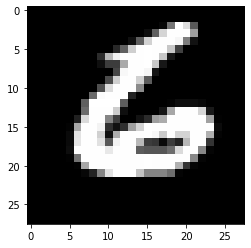

In [147]:
test_data = X_test[-1].reshape(1,28,28,1)
pred_y = model.predict(test_data).argmax()
real_y = Y_test[-1].argmax()
print('predict label : {}, real label : {}'.format(pred_y, real_y))
plt.imshow(X_test[-1].reshape(28,28), cmap='gray')

In [158]:
y_pred = model.predict(X_test)

In [176]:
y_test = list(map(np.argmax, Y_test))

In [179]:
def error_mnist(prediction_array, true_label):
    error_index = []
    for i in range(len(true_label)):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

In [180]:
error = error_mnist(y_pred, y_test)

In [181]:
error

[321,
 445,
 582,
 659,
 947,
 1014,
 1232,
 1247,
 1260,
 1393,
 1530,
 1878,
 1901,
 2035,
 2118,
 2130,
 2135,
 2414,
 2462,
 2597,
 2654,
 2720,
 2896,
 2953,
 3422,
 3558,
 3762,
 3808,
 4078,
 4176,
 4199,
 4740,
 4814,
 4823,
 5937,
 5955,
 6576,
 6597,
 6625,
 9664,
 9729,
 9839]

predict label : 7, real label : 2


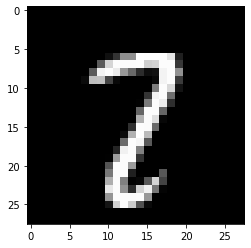

In [174]:
pred_y = y_pred[321].argmax()
real_y = Y_test[321].argmax()
print('predict label : {}, real label : {}'.format(pred_y, real_y))
plt.imshow(X_test[321].reshape(28,28), cmap='gray')